In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys

radar_path = "/content/drive/MyDrive/Radar"
if radar_path not in sys.path:
    sys.path.insert(0, radar_path)

class_list=['DJI_Matrice_300_RTK', 'DJI_Mavic_Air_2', 'DJI_Mavic_Mini', 'DJI_Phantom_4', 'Parrot_Disco']
class_dict={'DJI_Matrice_300_RTK': 0, 'DJI_Mavic_Air_2': 1, 'DJI_Mavic_Mini': 2, 'DJI_Phantom_4': 3, 'Parrot_Disco': 4}
data[0].shape=torch.Size([1, 2, 16, 251])
data[1]=tensor([4])


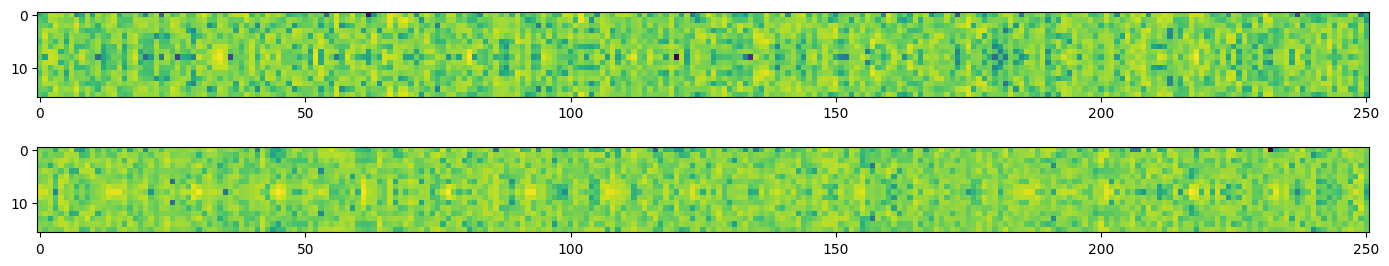

data[0].shape=torch.Size([1, 2, 16, 251])
data[1]=tensor([3])


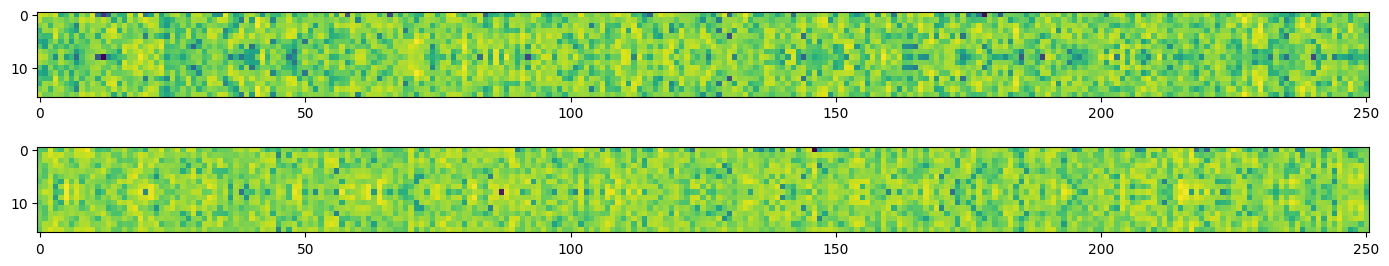

data[0].shape=torch.Size([1, 2, 16, 251])
data[1]=tensor([2])


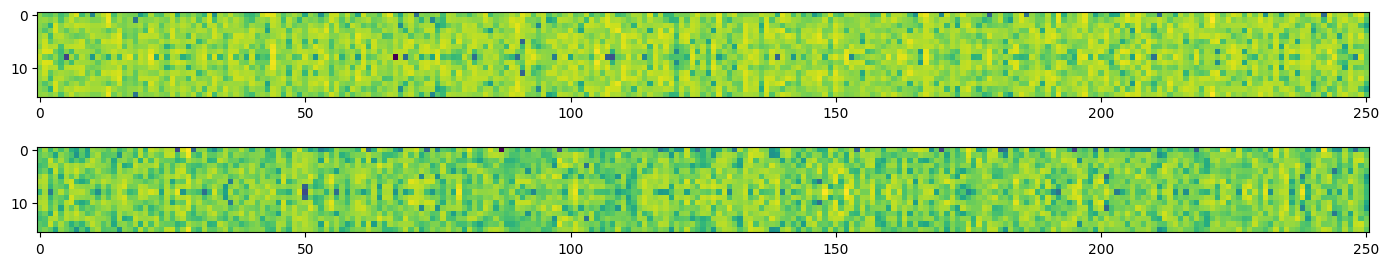

data[0].shape=torch.Size([1, 2, 16, 251])
data[1]=tensor([2])


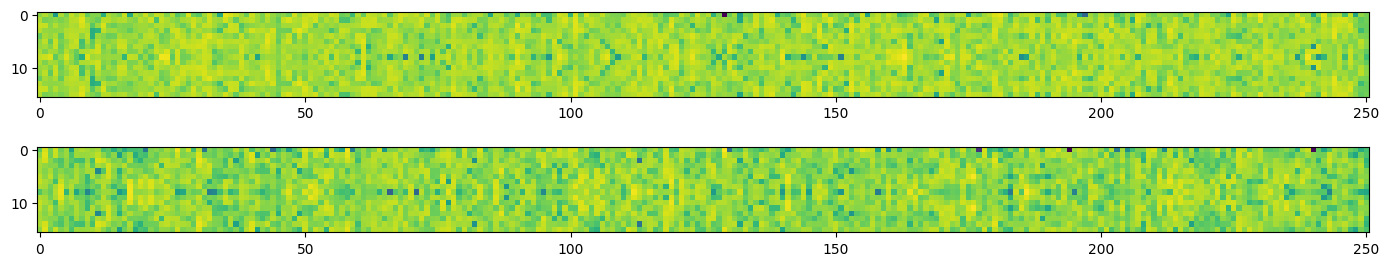

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.datasets as ds

def dataloader(file_extension):
    data = np.load(file_extension)
    return data

def plot_spectrogram(sp):
    fig, axs = plt.subplots(2, ncols=1, figsize=(14,3))

    axs[0].imshow(sp[0])
    axs[1].imshow(sp[1])

    plt.tight_layout()
    plt.show()


conf = {}
conf['f_s'] = 10_000
conf['SNR'] = -5
conf['batch_size'] = 1

dataset_root_template = f"{radar_path}/data/trainset/{conf['f_s']}fs/{conf['SNR']}SNR"
trainds = ds.DatasetFolder(
    dataset_root_template, dataloader, extensions=("npy",))
trainLoader = torch.utils.data.DataLoader(
    trainds, conf["batch_size"], shuffle=True, num_workers=2)

class_list, class_dict = trainds.find_classes(dataset_root_template)
print(f"{class_list=}")
print(f"{class_dict=}")

for i, data in enumerate(trainLoader):
    print(f"{data[0].shape=}")
    print(f"{data[1]=}")
    plot_spectrogram(torch.squeeze(data[0]))
    if i == 3:
      break